<a href="https://colab.research.google.com/github/alfinbinoy2020/Prodigy/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing values in train dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


/tmp/ipython-input-4207093835.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=train, palette='Set2')


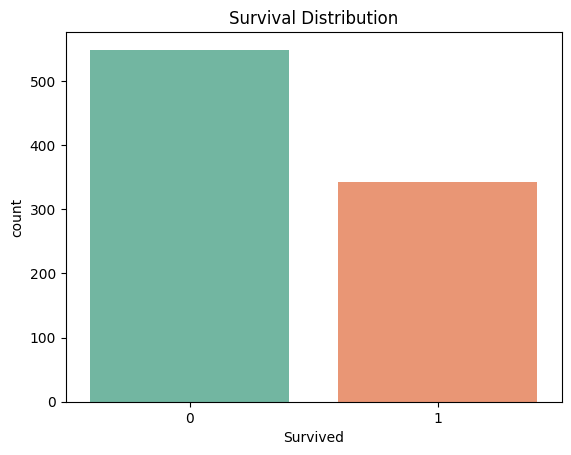

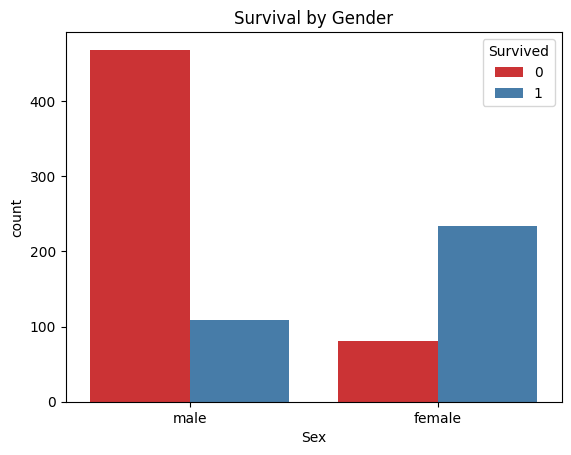

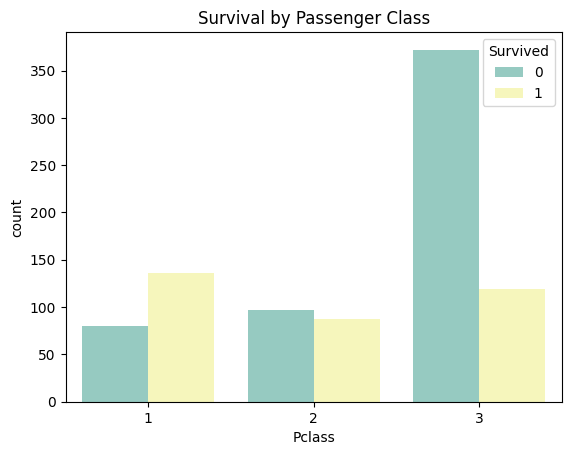

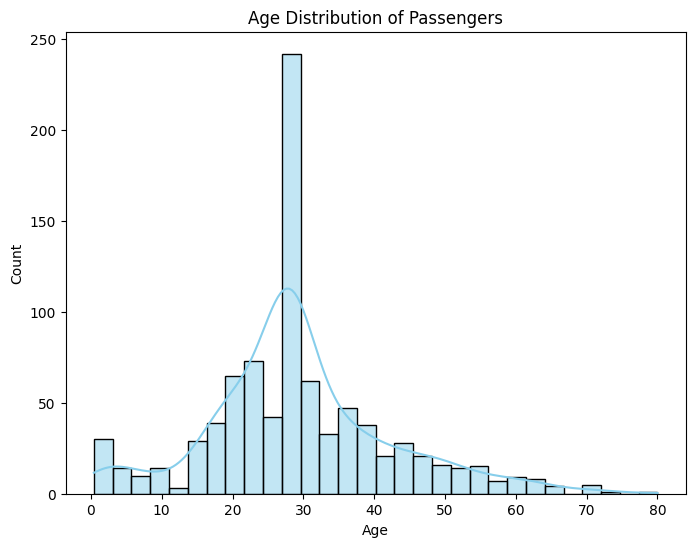

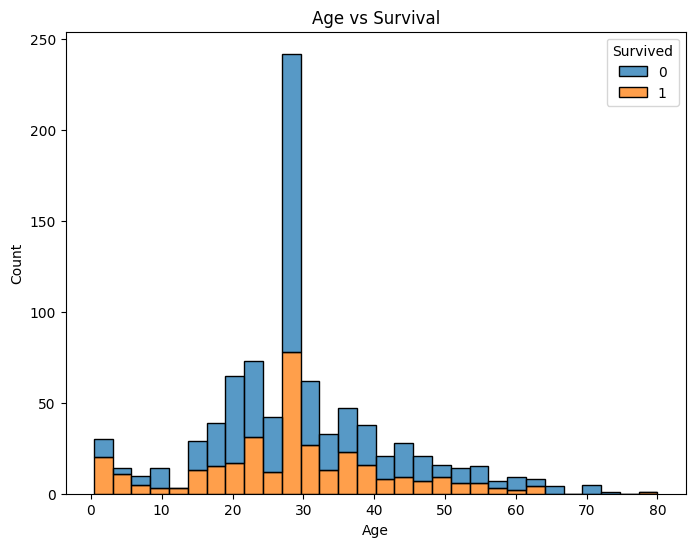

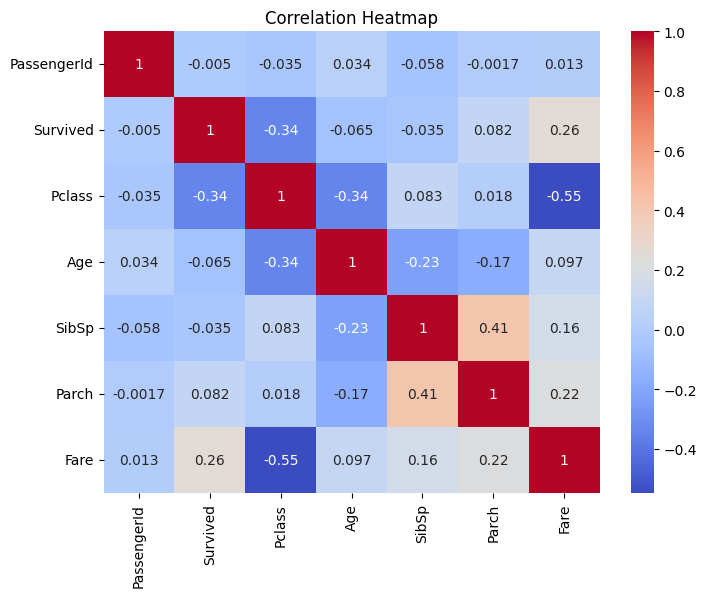

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64
Survived
0    30.028233
1    28.291433
Name: Age, dtype: float64


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
gender_submission = pd.read_csv("/content/gender_submission.csv")
print("Missing values in train dataset:")
print(train.isnull().sum())
train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
test['Fare'] = test['Fare'].fillna(test['Fare'].median())
train = train.drop(columns=['Cabin'])
test = test.drop(columns=['Cabin'])
sns.countplot(x='Survived', data=train, palette='Set2')
plt.title("Survival Distribution")
plt.show()
sns.countplot(x='Sex', hue='Survived', data=train, palette='Set1')
plt.title("Survival by Gender")
plt.show()
sns.countplot(x='Pclass', hue='Survived', data=train, palette='Set3')
plt.title("Survival by Passenger Class")
plt.show()
plt.figure(figsize=(8,6))
sns.histplot(train['Age'], bins=30, kde=True, color="skyblue")
plt.title("Age Distribution of Passengers")
plt.show()
plt.figure(figsize=(8,6))
sns.histplot(data=train, x='Age', hue='Survived', bins=30, kde=False, multiple='stack')
plt.title("Age vs Survival")
plt.show()
plt.figure(figsize=(8,6))
sns.heatmap(train.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
print(train.groupby(['Sex', 'Pclass'])['Survived'].mean())
print(train.groupby('Survived')['Age'].mean())